In [1]:
import pandas as pd
import sys
import os

In [2]:
from text_processing import *

In [3]:
dataset_scopus = pd.read_csv('dataset/data_scopus_raw.csv')
dataset_scopus

,abstract,title,DOI,created,score,URL,journal
0,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.101.01supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.01supp,Studies in Mycology
1,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.101.02supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.02supp,Studies in Mycology
2,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.102.01supp,"{'date-parts': [[2023, 3, 23]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.102.01supp,Studies in Mycology
3,<jats:p>\n Supplementary files:&lt;br /&gt;...,['Taxonomy and systematics of the fungus-growi...,10.3114/sim.2023.106.06-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2023.106.06-supp,Studies in Mycology
4,<jats:p>\n Supplementary files. &lt;br /&gt...,['In search of lost ergots: phylogenetic re-ev...,10.3114/sim.2022.106.01-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.106.01-supp,Studies in Mycology
...,...,...,...,...,...,...,...
2447,<jats:title>ABSTRACT</jats:title><jats:p>Recen...,['Is There a Risk Premium in the Stock Lending...,10.1111/jofi.13129,"{'date-parts': [[2022, 4, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13129,Journal of Finance
2448,<jats:title>ABSTRACT</jats:title><jats:p>We pr...,['Bayesian Solutions for the Factor Zoo: We Ju...,10.1111/jofi.13197,"{'date-parts': [[2022, 12, 10]], 'date-time': ...",0.0,http://dx.doi.org/10.1111/jofi.13197,Journal of Finance
2449,<jats:title>ABSTRACT</jats:title><jats:p>In th...,['Presidential Address: Sustainable Finance an...,10.1111/jofi.13255,"{'date-parts': [[2023, 6, 20]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13255,Journal of Finance
2450,<jats:title>ABSTRACT</jats:title><jats:p>This ...,['Long‐Run Risk: Is It There?'],10.1111/jofi.13126,"{'date-parts': [[2022, 3, 29]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13126,Journal of Finance


In [4]:
dataset_scopus.drop_duplicates(inplace=True)
dataset_scopus.dropna(inplace=True)
dataset_scopus

,abstract,title,DOI,created,score,URL,journal
0,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.101.01supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.01supp,Studies in Mycology
1,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.101.02supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.02supp,Studies in Mycology
2,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.102.01supp,"{'date-parts': [[2023, 3, 23]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.102.01supp,Studies in Mycology
3,<jats:p>\n Supplementary files:&lt;br /&gt;...,['Taxonomy and systematics of the fungus-growi...,10.3114/sim.2023.106.06-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2023.106.06-supp,Studies in Mycology
4,<jats:p>\n Supplementary files. &lt;br /&gt...,['In search of lost ergots: phylogenetic re-ev...,10.3114/sim.2022.106.01-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.106.01-supp,Studies in Mycology
...,...,...,...,...,...,...,...
2447,<jats:title>ABSTRACT</jats:title><jats:p>Recen...,['Is There a Risk Premium in the Stock Lending...,10.1111/jofi.13129,"{'date-parts': [[2022, 4, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13129,Journal of Finance
2448,<jats:title>ABSTRACT</jats:title><jats:p>We pr...,['Bayesian Solutions for the Factor Zoo: We Ju...,10.1111/jofi.13197,"{'date-parts': [[2022, 12, 10]], 'date-time': ...",0.0,http://dx.doi.org/10.1111/jofi.13197,Journal of Finance
2449,<jats:title>ABSTRACT</jats:title><jats:p>In th...,['Presidential Address: Sustainable Finance an...,10.1111/jofi.13255,"{'date-parts': [[2023, 6, 20]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13255,Journal of Finance
2450,<jats:title>ABSTRACT</jats:title><jats:p>This ...,['Long‐Run Risk: Is It There?'],10.1111/jofi.13126,"{'date-parts': [[2022, 3, 29]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13126,Journal of Finance


In [5]:
dataset_scopus.groupby(['journal']).count()

,abstract,title,DOI,created,score,URL
journal,,,,,,
Administrative Science Quarterly,58,58,58,58,58,58
Annual Review of Astronomy and Astrophysics,25,25,25,25,25,25
Artificial Intelligence Review,200,200,200,200,200,200
Journal of Finance,174,174,174,174,174,174
Progress in Orthodontics,114,114,114,114,114,114
Studies in Mycology,39,39,39,39,39,39


In [6]:
dataset_scopus.title = dataset_scopus.title.apply(lambda x : '{} '.format(eval(x)[0]))
dataset_scopus['data'] = dataset_scopus.title + dataset_scopus.abstract
dataset_scopus

,abstract,title,DOI,created,score,URL,journal,data
0,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.101.01supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.01supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...
1,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.101.02supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.02supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...
2,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.102.01supp,"{'date-parts': [[2023, 3, 23]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.102.01supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...
3,<jats:p>\n Supplementary files:&lt;br /&gt;...,Taxonomy and systematics of the fungus-growing...,10.3114/sim.2023.106.06-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2023.106.06-supp,Studies in Mycology,Taxonomy and systematics of the fungus-growing...
4,<jats:p>\n Supplementary files. &lt;br /&gt...,In search of lost ergots: phylogenetic re-eval...,10.3114/sim.2022.106.01-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.106.01-supp,Studies in Mycology,In search of lost ergots: phylogenetic re-eval...
...,...,...,...,...,...,...,...,...
2447,<jats:title>ABSTRACT</jats:title><jats:p>Recen...,Is There a Risk Premium in the Stock Lending M...,10.1111/jofi.13129,"{'date-parts': [[2022, 4, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13129,Journal of Finance,Is There a Risk Premium in the Stock Lending M...
2448,<jats:title>ABSTRACT</jats:title><jats:p>We pr...,Bayesian Solutions for the Factor Zoo: We Just...,10.1111/jofi.13197,"{'date-parts': [[2022, 12, 10]], 'date-time': ...",0.0,http://dx.doi.org/10.1111/jofi.13197,Journal of Finance,Bayesian Solutions for the Factor Zoo: We Just...
2449,<jats:title>ABSTRACT</jats:title><jats:p>In th...,Presidential Address: Sustainable Finance and ...,10.1111/jofi.13255,"{'date-parts': [[2023, 6, 20]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13255,Journal of Finance,Presidential Address: Sustainable Finance and ...
2450,<jats:title>ABSTRACT</jats:title><jats:p>This ...,Long‐Run Risk: Is It There?,10.1111/jofi.13126,"{'date-parts': [[2022, 3, 29]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13126,Journal of Finance,Long‐Run Risk: Is It There? <jats:title>ABSTRA...


In [7]:
cleaned_data = dataset_scopus.data.apply(preprocess_text)
cleaned_data

0       supplementary files      fig s phylogenetic tr...
1       supplementary files      fig s phylogenetic tr...
2       supplementary files      fig s multilocus phyl...
3       taxonomy and systematics of the fungusgrowing ...
4       in search of lost ergots phylogenetic reevalua...
                              ...                        
2447    recent research argues that uncertainty about ...
2448    we propose a novel framework for analyzing lin...
2449    in this address i discuss differences across i...
2450    this paper documents the existence of a persis...
2451    we develop a method that identifies the attent...
Name: data, Length: 610, dtype: object

In [8]:
dataset_scopus['cleaned_data'] = cleaned_data

(array([ 11., 170.,  47., 106., 152.,  68.,  42.,  10.,   2.,   2.]),
 array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. , 307.2, 358.4, 409.6,
        460.8, 512. ]),
 <BarContainer object of 10 artists>)

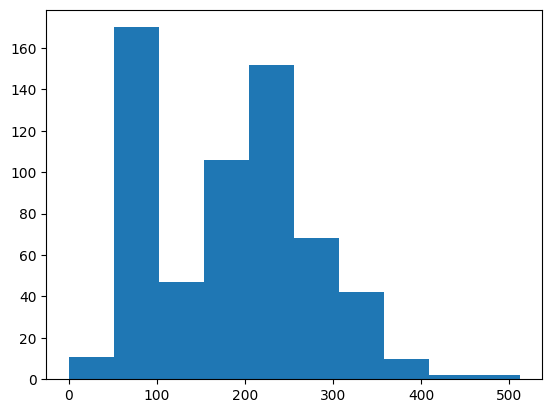

In [9]:
import matplotlib.pyplot as plt

word_count = dataset_scopus.cleaned_data.apply(lambda x : len(x.split()))
plt.hist(word_count)

In [11]:
dataset_scopus.to_csv('dataset/data_scopus_cleaned.csv', index=False)